In [8]:
import geopandas as gpd
from shapely.geometry import Polygon

# Coordinates for a simplified bounding box of Oahu, Hawaii
oahu_coordinates = [
    (-158.3, 21.2),  # Southwest corner
    (-157.6, 21.2),  # Southeast corner
    (-157.6, 21.8),  # Northeast corner
    (-158.3, 21.8),  # Northwest corner
    (-158.3, 21.2)   # Closing the polygon
]

# Create a Polygon from the coordinates
oahu_polygon = Polygon(oahu_coordinates)

# Create a GeoDataFrame with the Polygon
oahu_gdf = gpd.GeoDataFrame([{'geometry': oahu_polygon, 'name': 'Oahu'}], crs="EPSG:4326")

# Diagnostic checks
print("GeoDataFrame head:")
print(oahu_gdf.head())

# Save the GeoDataFrame as a Shapefile
shapefile_path = 'oahu_boundary.shp'
oahu_gdf.to_file(shapefile_path, driver='ESRI Shapefile')

print(f"Shapefile created successfully at {shapefile_path}")


GeoDataFrame head:
                                            geometry  name
0  POLYGON ((-158.30000 21.20000, -157.60000 21.2...  Oahu
Shapefile created successfully at oahu_boundary.shp


In [4]:
# Path to the downloaded Shapefile
downloaded_shapefile = 'oahu_boundary.shp'

# Load the Shapefile
oahu_gdf = gpd.read_file(downloaded_shapefile)

# Save as GeoPackage (optional)
output_gpkg = 'oahu_hawaii.gpkg'
oahu_gdf.to_file(output_gpkg, layer='Oahu_Boundary', driver='GPKG')

print(f"GeoPackage created successfully at {output_gpkg}")

GeoPackage created successfully at oahu_hawaii.gpkg


GeoPackage created successfully with Oahu_Boundary layer


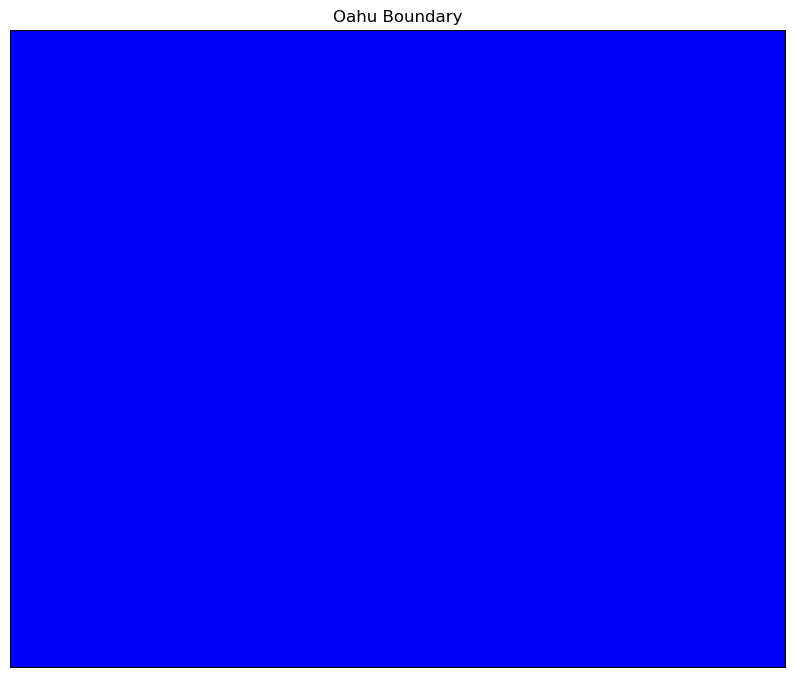

In [7]:
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

# More accurate coordinates for the approximate boundary of Oahu, Hawaii
oahu_coordinates = [
    (-158.276, 21.254),  # Example coordinate points
    (-157.675, 21.254),
    (-157.675, 21.714),
    (-158.276, 21.714),
    (-158.276, 21.254)   # Closing the polygon
]

# Create a Polygon from the coordinates
oahu_polygon = Polygon(oahu_coordinates)

# Create a GeoDataFrame with the Polygon
oahu_gdf = gpd.GeoDataFrame([{'geometry': oahu_polygon, 'name': 'Oahu'}], crs="EPSG:4326")

# Save the GeoDataFrame as a GeoPackage with the specified layer name
output_gpkg = 'oahu_hawaii.gpkg'
oahu_gdf.to_file(output_gpkg, layer='Oahu_Boundary', driver='GPKG')

print("GeoPackage created successfully with Oahu_Boundary layer")

# Read the GeoPackage file and plot it
geo_file = "oahu_hawaii.gpkg"
aoi_gdf = gpd.read_file(geo_file, layer="Oahu_Boundary")

# Plot the GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
aoi_gdf.plot(ax=ax, color='blue', edgecolor='black')
ax.set_title("Oahu Boundary")
plt.axis('off')

# Calculate the bounding box manually
minx, miny = aoi_gdf.geometry.total_bounds[:2]
maxx, maxy = aoi_gdf.geometry.total_bounds[2:]

# Set axis limits to the bounding box of the geometry
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

plt.show()

